In [1]:
# Import Libraries
import pandas as pd
from pathlib import Path
import pandas_datareader as pdr
import numpy as np
import os
import hvplot.pandas
import seaborn as sns
import plotly.express as px
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\kn_na\anaconda3\envs\pyviz\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
# Set start and end datetimes.
today = pd.Timestamp("2020-11-11", tz="America/New_York").isoformat()

# Set the tickers
tickers = ['AA', 'ALB', 'CLF', 'FCX', 'HL', 'NEM', 'NUE', 'SCCO', 'STLD', 'WPM', 'XME']

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current price data
stocks_df = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
stocks_df

AA                                       ALB  \
                            open     high      low close    volume    open   
time                                                                         
2020-11-11 00:00:00-05:00  16.21  16.3401  15.6849  15.9  10656795  117.62   

                                                           ...  WPM         \
                             high    low   close   volume  ... open   high   
time                                                       ...               
2020-11-11 00:00:00-05:00  119.98  116.5  118.58  1359730  ...   44  44.69   

                                                    XME                       \
                             low  close   volume   open   high    low  close   
time                                                                           
2020-11-11 00:00:00-05:00  43.42  44.64  3821548  27.16  27.22  26.71  26.95   

                                    
                            volume  
time                                
2020-11-11 00:00:00-05:00  2197796  

[1 rows x 55 columns]

In [5]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-11-11', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-11', tz='America/New_York').isoformat()

In [6]:
# Get 5 years' worth of historical data for FCX
ticker_fcx = ["FCX"]
timeframe = "1D"

# Display sample data
fcx_data = api.get_barset(
    ticker_fcx,
    timeframe,
    start = start_date,
    end = end_date
).df

MC_stocks_fcx = MCSimulation(
    portfolio_data = fcx_data,
    weights = [1.0],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_stocks_fcx.portfolio_data.head()

FCX                                            
                           open   high   low   close    volume daily_return
time                                                                       
2015-11-11 00:00:00-05:00  9.91  9.920  9.02  9.3001  39490279          NaN
2015-11-12 00:00:00-05:00  8.86  9.176  8.60  8.7700  44479257    -0.056999
2015-11-13 00:00:00-05:00  8.97  8.990  8.64  8.6720  30450454    -0.011174
2015-11-16 00:00:00-05:00  8.71  8.920  8.61  8.8600  28380345     0.021679
2015-11-17 00:00:00-05:00  8.94  8.970  8.33  8.4000  30596517    -0.051919

In [7]:
MC_stocks_fcx.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1          2          3         4         5         6    \
0     1.000000  1.000000   1.000000   1.000000  1.000000  1.000000  1.000000   
1     1.056506  1.104681   1.041100   0.973715  1.048418  1.072286  1.010431   
2     1.045854  1.068477   1.047207   0.959817  0.991433  1.112219  1.051957   
3     1.039179  1.074810   1.070170   0.932661  0.942361  1.156768  1.020122   
4     1.057652  1.046038   1.077859   0.975894  0.972866  1.161855  1.063812   
5     1.076822  1.033239   1.090219   0.942712  0.938290  1.207256  1.063337   
6     1.077830  1.008036   1.045620   1.007127  0.971348  1.235478  1.063913   
7     1.103559  1.019843   1.034505   1.006989  1.005498  1.266146  1.057042   
8     1.083025  1.049145   0.944829   1.038533  0.909899  1.283332  1.124300   
9     1.142292  1.071798   0.966821   1.073454  0.903420  1.247361  1.153713   
10    1.093055  1.084469   0.964156   1.092107  0.884022  1.219479  1.191201   
11    1.099929  1.083129   0.970870   1.092197  0.900405  1.117994  1.164082   
12    1.107431  1.148226   0.951034   1.108167  0.916439  1.099982  1.104582   
13    1.115240  1.126106   0.935475   1.192961  0.892319  1.023213  1.082684   
14    1.110989  1.116003   0.941470   1.295366  0.913679  1.012428  1.025189   
15    1.117994  1.177225   0.969187   1.294615  0.882437  1.076904  1.005504   
16    1.096890  1.143784   0.945153   1.386273  0.913284  1.107167  1.070406   
17    1.127908  1.189936   0.981703   1.360218  0.933618  1.149590  1.051740   
18    1.070328  1.209885   1.037847   1.399802  0.954557  1.124026  1.078115   
19    0.983811  1.165307   1.093459   1.430647  0.945464  1.089810  1.053484   
20    0.909836  1.156722   1.073258   1.419658  0.997245  1.107913  1.017266   
21    0.901236  1.197900   1.061805   1.346673  0.968140  1.156214  1.035972   
22    0.841385  1.167476   1.056425   1.314666  0.969947  1.159065  1.045867   
23    0.815142  1.183504   1.089699   1.290688  1.000228  1.182043  1.029174   
24    0.850450  1.211731   1.133349   1.309725  1.021876  1.185124  0.992188   
25    0.893284  1.258326   1.087948   1.294418  1.093843  1.212955  1.057005   
26    0.867955  1.238896   1.107454   1.260404  1.118659  1.191809  1.090189   
27    0.844324  1.241552   1.137991   1.247062  1.103047  1.257194  1.082996   
28    0.829777  1.251870   1.189028   1.272070  1.110512  1.289714  1.065472   
29    0.816209  1.166733   1.197641   1.275635  1.069611  1.281517  1.096293   
...        ...       ...        ...        ...       ...       ...       ...   
2491  0.955658  8.646196  24.766278  69.870861  1.512888  3.958651  7.698894   
2492  0.933218  8.345040  25.543734  67.603362  1.515265  4.196730  7.805643   
2493  0.847663  7.784185  23.841993  70.353136  1.464139  4.123601  7.640804   
2494  0.832447  7.738863  23.718964  74.577727  1.431131  4.025918  7.930295   
2495  0.862561  7.256197  24.522343  73.715271  1.465144  4.152653  7.516083   
2496  0.902561  7.569230  24.040771  77.346471  1.498016  4.066916  7.413585   
2497  0.850245  7.221910  23.995411  77.366501  1.494149  4.131125  7.530038   
2498  0.880522  6.501316  23.435334  76.534234  1.575195  4.179618  7.505544   
2499  0.898586  5.898450  23.298827  75.241126  1.605964  4.020962  7.541284   
2500  0.866507  5.911337  23.794492  79.627581  1.563786  4.009839  8.262900   
2501  0.877320  6.016181  23.757230  77.377114  1.494017  3.909662  8.340019   
2502  0.815313  6.219038  24.553914  81.072059  1.510559  3.826162  8.053570   
2503  0.822830  6.418074  24.267725  82.733353  1.566238  3.790763  8.338358   
2504  0.807902  6.885858  23.281329  83.026212  1.617206  3.974562  8.529768   
2505  0.839725  6.541901  25.435864  83.033835  1.726886  4.333488  8.678483   
2506  0.812127  6.353704  23.835634  84.899279  1.623417  4.214226  8.288159   
2507  0.785109  5.954959  24.181190  84.537935  1.650880  4.363026  8.894406   
2508  0.757341  5.720981  25.009489  83.756023  1.607469  4.042518  8.600351   
2509  0.774

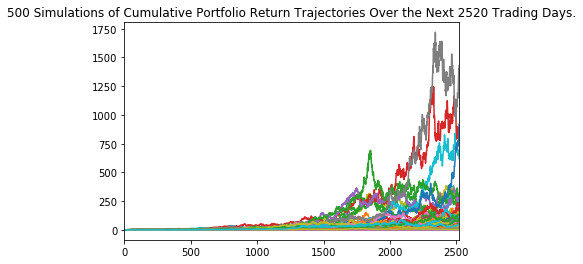

In [8]:
line_plot_fcx = MC_stocks_fcx.plot_simulation()

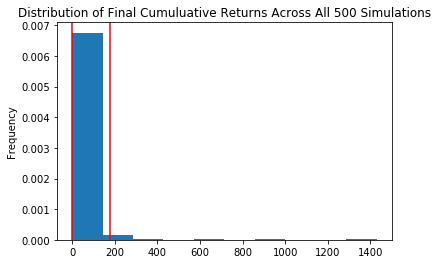

In [9]:
bar_plot_fcx = MC_stocks_fcx.plot_distribution()

In [10]:
stocks_tbl_fcx = MC_stocks_fcx.summarize_cumulative_return()

print(stocks_tbl_fcx)

count            500.000000
mean              25.868580
std               96.464902
min                0.010972
25%                1.288567
50%                4.528425
75%               16.286875
max             1429.117499
95% CI Lower       0.118620
95% CI Upper     177.696140
Name: 2520, dtype: float64


In [11]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100000
ci_lower_fcx = round(stocks_tbl_fcx[8]*initial_investment,2)
ci_upper_fcx = round(stocks_tbl_fcx[9]*initial_investment,2)

potential_gain_fcx = round(((ci_upper_fcx - initial_investment)/initial_investment)*100,2)  
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_fcx} and ${ci_upper_fcx}"
      f" for a potential gain of {potential_gain_fcx}" "%" )

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $11862.01 and $17769614.03 for a potential gain of 17669.61%


In [12]:
# Get 5 years' worth of historical data for NUE
ticker_nue = ["NUE"]
timeframe = "1D"

# Display sample data
nue_data = api.get_barset(
    ticker_nue,
    timeframe,
    start = start_date,
    end = end_date
).df

MC_stocks_nue = MCSimulation(
    portfolio_data = nue_data,
    weights = [1.0],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_stocks_nue.portfolio_data.head()

NUE                                           
                            open   high    low  close   volume daily_return
time                                                                       
2015-11-11 00:00:00-05:00  41.96  41.98  40.90  41.21  1441769          NaN
2015-11-12 00:00:00-05:00  40.54  40.55  39.33  40.11  3186078    -0.026693
2015-11-13 00:00:00-05:00  40.12  41.20  40.11  40.64  1176032     0.013214
2015-11-16 00:00:00-05:00  40.59  41.41  40.45  41.10  1295968     0.011319
2015-11-17 00:00:00-05:00  41.14  41.23  40.39  40.53  1613944    -0.013869

In [13]:
MC_stocks_nue.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.984234  0.996251  0.999347  0.993614  1.031461  0.995341  0.985609   
2     0.999088  1.001596  0.973152  0.982451  1.061270  0.993806  0.991620   
3     1.007974  1.016990  0.979151  0.977674  1.057443  0.984046  0.995505   
4     0.998315  0.998429  0.976592  0.967857  1.041302  1.015788  1.005098   
5     1.002110  0.989870  0.952139  0.978006  1.052390  1.015788  1.000445   
6     1.054357  1.018849  0.962445  0.980753  1.037863  1.018594  0.988906   
7     1.054055  1.024436  0.952309  0.984128  1.064237  1.030476  0.983304   
8     1.086970  1.050523  0.943188  0.992270  1.034667  1.038298  0.994541   
9     1.099615  1.078696  0.961027  0.987744  1.011814  1.058679  1.014852   
10    1.145293  1.059938  0.960641  1.011239  1.045745  1.048953  0.972632   
11    1.117366  1.060711  0.951062  1.000525  1.084325  1.089343  0.935631   
12    1.143992  1.079804  0.949504  1.001512  1.096059  1.094362  0.933244   
13    1.137820  1.057882  0.970571  0.998287  1.079416  1.110556  0.929441   
14    1.143585  1.066484  0.932569  1.008693  1.104903  1.089821  0.915180   
15    1.133072  1.078518  0.915139  1.009380  1.078485  1.099752  0.928656   
16    1.136162  1.054876  0.893341  1.017996  1.115101  1.124161  0.919633   
17    1.152317  1.084301  0.884416  1.039227  1.111613  1.148564  0.930053   
18    1.170485  1.076318  0.900727  1.028613  1.119868  1.117092  0.904812   
19    1.137772  1.072662  0.880896  1.048608  1.117261  1.058734  0.897969   
20    1.094281  1.099587  0.871521  1.081705  1.123410  1.037018  0.909783   
21    1.072011  1.121628  0.866103  1.110572  1.161417  1.052114  0.905108   
22    1.061256  1.126122  0.875421  1.067886  1.174920  1.065238  0.897982   
23    1.102238  1.139102  0.891090  1.045541  1.226721  1.050490  0.933836   
24    1.059781  1.156664  0.881452  1.064841  1.255931  1.083794  0.908633   
25    1.049378  1.180417  0.898541  1.064510  1.224381  1.083671  0.927723   
26    1.070491  1.185249  0.903496  1.079295  1.223962  1.059496  0.967879   
27    1.053073  1.206523  0.918700  1.118179  1.212740  1.104878  0.971523   
28    1.048955  1.188813  0.902953  1.107623  1.236257  1.132234  0.996548   
29    1.021574  1.188107  0.920840  1.087459  1.256447  1.159294  0.986876   
...        ...       ...       ...       ...       ...       ...       ...   
2491  0.190935  2.510177  1.022085  4.049068  3.920576  1.863321  0.630081   
2492  0.190014  2.535458  1.040553  4.155219  3.954920  1.895726  0.599969   
2493  0.189423  2.596233  1.039632  4.109113  3.936261  1.865877  0.595557   
2494  0.181417  2.562863  1.036860  4.076163  3.979481  1.832499  0.594806   
2495  0.180458  2.604683  0.998134  4.122596  4.072598  1.749392  0.590655   
2496  0.184006  2.536559  0.987522  3.893620  4.067391  1.707930  0.584439   
2497  0.183405  2.609986  0.986602  3.996472  4.090599  1.679069  0.562444   
2498  0.178808  2.653319  0.970821  3.922519  4.171264  1.670096  0.572677   
2499  0.183972  2.640444  1.008073  3.860861  4.192806  1.640778  0.566193   
2500  0.187675  2.724043  0.992064  3.992952  4.216274  1.652332  0.567453   
2501  0.194993  2.815239  0.976140  4.023685  4.360616  1.626435  0.576827   
2502  0.200473  2.863769  0.946625  3.934810  4.333300  1.609909  0.579419   
2503  0.202579  2.796639  0.942319  4.015356  4.347876  1.684021  0.573671   
2504  0.209146  2.813972  0.965467  3.933588  4.390442  1.602238  0.557237   
2505  0.204149  2.827848  0.959404  3.951422  4.218249  1.581654  0.543357   
2506  0.205721  2.814019  0.972029  4.079618  4.375990  1.600601  0.533465   
2507  0.200920  2.797547  0.946408  4.020259  4.357274  1.565825  0.520980   
2508  0.206864  2.880403  0.976017  4.039817  4.309274  1.586276  0.537871   
2509  0.206507  2.940443  0.948899  3.995433  4.402294  1.633705  0.537359   
2510  0.211935  2.937112  0.95367

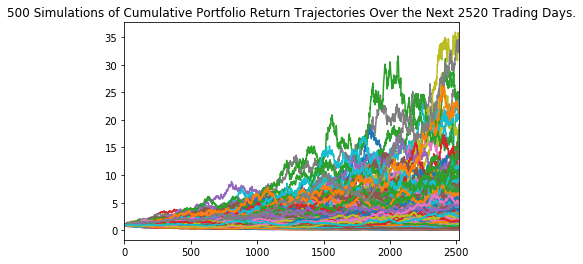

In [14]:
line_plot_nue = MC_stocks_nue.plot_simulation()

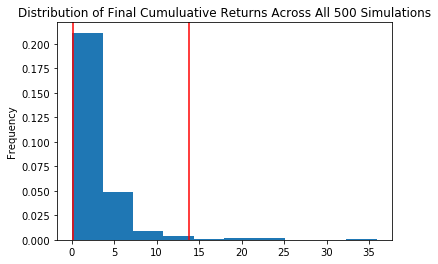

In [15]:
bar_plot_nue = MC_stocks_nue.plot_distribution()

In [16]:
stocks_tbl_nue = MC_stocks_nue.summarize_cumulative_return()

print(stocks_tbl_nue)

count           500.000000
mean              2.902998
std               4.022942
min               0.076135
25%               0.736120
50%               1.646566
75%               3.456606
max              35.876257
95% CI Lower      0.193364
95% CI Upper     13.839158
Name: 2520, dtype: float64


In [17]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100000
ci_lower_nue = round(stocks_tbl_nue[8]*initial_investment,2)
ci_upper_nue = round(stocks_tbl_nue[9]*initial_investment,2)

potential_gain_nue = round(((ci_upper_nue - initial_investment)/initial_investment)*100,2)  

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_nue} and ${ci_upper_nue}"
      f" for a potential gain of {potential_gain_nue}" "%" )

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $19336.35 and $1383915.82 for a potential gain of 1283.92%


In [18]:
# Get 5 years' worth of historical data for XME
ticker_xme = ["XME"]
timeframe = "1D"

# Display sample data
xme_data = api.get_barset(
    ticker_xme,
    timeframe,
    start = start_date,
    end = end_date
).df

MC_stocks_xme = MCSimulation(
    portfolio_data = xme_data,
    weights = [1.0],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_stocks_xme.portfolio_data.head()

XME                                           
                            open   high    low  close   volume daily_return
time                                                                       
2015-11-11 00:00:00-05:00  16.76  16.76  16.29  16.44  1224901          NaN
2015-11-12 00:00:00-05:00  16.18  16.29  15.93  15.95  2154029    -0.029805
2015-11-13 00:00:00-05:00  15.93  16.33  15.83  15.97  2938275     0.001254
2015-11-16 00:00:00-05:00  16.10  16.42  16.00  16.20  2017072     0.014402
2015-11-17 00:00:00-05:00  16.22  16.22  15.58  15.63  2399502    -0.035185

In [19]:
MC_stocks_xme.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3          4         5         6    \
0     1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  1.000000   
1     0.960603  0.985976  1.029493  1.010644   0.996392  1.028590  1.028607   
2     0.949520  0.987181  1.050198  1.039549   0.957062  1.020541  1.018930   
3     0.911790  1.020250  1.057659  1.045706   0.926935  0.983620  1.013238   
4     0.900659  0.996886  1.058333  1.050439   0.895464  0.940750  0.984699   
5     0.855776  0.953470  1.074517  1.056480   0.897785  0.956010  0.969936   
6     0.830371  0.934572  1.061997  1.072205   0.923392  0.978180  1.005222   
7     0.851422  0.934050  1.097944  1.051951   0.937900  0.986717  1.001169   
8     0.846060  0.945441  1.128467  1.034581   0.956457  0.986550  0.993395   
9     0.844876  0.955334  1.144269  1.041413   0.933683  0.994859  0.984401   
10    0.826501  0.981773  1.128589  1.055883   0.929876  1.004311  0.974675   
11    0.820384  0.962986  1.134290  1.057654   0.957582  0.984755  0.971517   
12    0.795441  0.969820  1.142468  1.053149   0.942251  0.994849  0.958885   
13    0.811247  0.943405  1.131985  1.053421   0.952772  1.028832  0.930361   
14    0.798160  0.942247  1.086503  1.044120   0.944484  1.008791  0.947211   
15    0.812705  0.957417  1.121152  1.042243   0.956671  1.038431  0.915668   
16    0.801351  0.917706  1.139242  1.036328   0.934003  1.019451  0.934153   
17    0.787956  0.928696  1.132580  0.998018   0.894066  1.021234  0.961610   
18    0.807578  0.899719  1.127965  0.970188   0.877210  1.031752  0.966004   
19    0.806607  0.886979  1.104116  0.951761   0.860252  1.020017  0.973539   
20    0.810059  0.877156  1.101620  0.930998   0.832344  1.038148  0.982601   
21    0.797467  0.862708  1.125039  0.941156   0.841459  1.050694  1.001064   
22    0.779779  0.867866  1.120762  0.915584   0.842289  1.055378  1.007234   
23    0.744278  0.883840  1.145391  0.922208   0.842087  1.050404  1.016637   
24    0.755535  0.890156  1.106002  0.933295   0.835302  1.028762  1.002067   
25    0.771099  0.885150  1.093891  0.950247   0.849780  1.056646  0.996771   
26    0.788846  0.890459  1.088103  0.947248   0.810840  1.039092  0.973494   
27    0.772264  0.894076  1.082248  0.970118   0.784339  1.025665  0.974058   
28    0.745933  0.873422  1.069595  0.929019   0.772273  1.043407  0.978662   
29    0.752723  0.902009  1.038459  0.943497   0.763115  1.056593  0.982596   
...        ...       ...       ...       ...        ...       ...       ...   
2491  1.333207  1.834296  0.932488  4.023932  11.771153  0.598754  3.307732   
2492  1.380615  1.785288  0.929014  3.983844  12.142281  0.605044  3.230902   
2493  1.362798  1.807932  0.918270  3.983971  12.120624  0.618064  3.373015   
2494  1.341643  1.831877  0.888145  4.127471  11.950993  0.611551  3.438558   
2495  1.396557  1.867465  0.894645  4.064803  12.364436  0.606771  3.471976   
2496  1.434057  1.883736  0.915930  4.117158  12.682501  0.604523  3.315251   
2497  1.464672  1.944658  0.948599  4.154311  12.937436  0.617229  3.223479   
2498  1.531656  1.908345  0.926792  4.176844  12.584394  0.606772  3.226993   
2499  1.534396  1.996649  0.948987  4.099228  12.204385  0.642644  3.292452   
2500  1.602609  1.981186  0.960993  4.201983  12.563826  0.644710  3.281448   
2501  1.646240  2.054552  0.959641  4.293999  12.176664  0.629686  3.294600   
2502  1.596261  2.024612  0.964995  4.304534  12.719638  0.628556  3.391545   
2503  1.607174  1.931792  0.948568  4.279314  12.284315  0.599738  3.300306   
2504  1.627984  1.933553  0.935385  4.133097  11.912404  0.586116  3.152770   
2505  1.600872  1.884184  0.941063  4.140029  12.149806  0.579579  3.208263   
2506  1.580269  1.961251  0.968908  4.062617  12.258319  0.572307  3.147231   
2507  1.591131  2.035253  0.929133  4.147875  11.725620  0.579954  3.196177   
2508  1.583433  1.962184  0.915655  4.210888  11.815737  0.568361  3.238895   
2509  1.595701  1.929847  0.883525  4.329980  12.188419  0.56

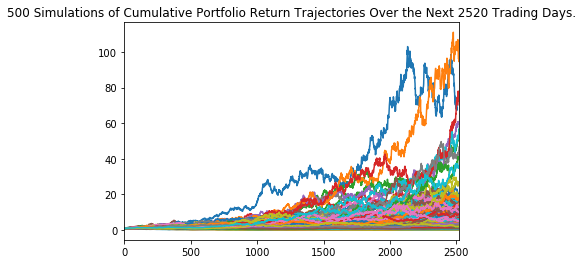

In [20]:
line_plot_xme = MC_stocks_xme.plot_simulation()

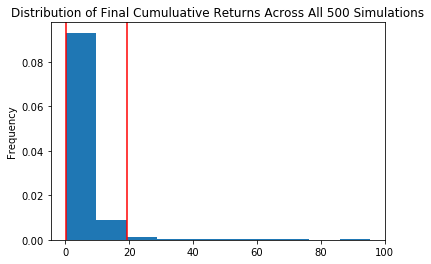

In [21]:
bar_plot_xme = MC_stocks_xme.plot_distribution()

In [22]:
stocks_tbl_xme = MC_stocks_xme.summarize_cumulative_return()

print(stocks_tbl_xme)

count           500.000000
mean              5.041103
std               8.760462
min               0.111228
25%               1.251713
50%               2.636787
75%               5.394159
max              95.477357
95% CI Lower      0.320821
95% CI Upper     19.415058
Name: 2520, dtype: float64


In [23]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100000
ci_lower_xme = round(stocks_tbl_xme[8]*initial_investment,2)
ci_upper_xme = round(stocks_tbl_xme[9]*initial_investment,2)

potential_gain_xme = round(((ci_upper_xme - initial_investment)/initial_investment)*100,2)  
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_xme} and ${ci_upper_xme}"
      f" for a potential gain of {potential_gain_xme}" "%" )

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $32082.11 and $1941505.84 for a potential gain of 1841.51%


In [24]:
# Get 5 years' worth of historical data for STLD
ticker_stld = ["STLD"]
timeframe = "1D"

# Display sample data
stld_data = api.get_barset(
    ticker_stld,
    timeframe,
    start = start_date,
    end = end_date
).df

MC_stocks_stld = MCSimulation(
    portfolio_data = stld_data,
    weights = [1.0],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_stocks_stld.portfolio_data.head()

STLD                                             
                            open    high     low  close   volume daily_return
time                                                                         
2015-11-11 00:00:00-05:00  17.26  17.300  16.615  17.23  3260676          NaN
2015-11-12 00:00:00-05:00  16.92  17.210  16.700  17.05  3136526    -0.010447
2015-11-13 00:00:00-05:00  17.10  17.430  17.020  17.24  1784752     0.011144
2015-11-16 00:00:00-05:00  17.19  17.490  16.940  17.40  1816576     0.009281
2015-11-17 00:00:00-05:00  17.36  17.525  17.080  17.28  1867315    -0.006897

In [25]:
MC_stocks_stld.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5          6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.000000   
1     1.030883  1.018633  0.974565  1.029848  0.996712  0.989454   0.982851   
2     1.068730  1.029798  0.949884  1.048957  1.008340  1.037836   0.994835   
3     1.097418  1.089367  0.997875  1.036617  1.005181  1.098808   0.980902   
4     1.041956  1.089589  1.064492  1.051923  1.034129  1.098618   1.001223   
5     1.029290  1.065292  1.049796  1.082971  1.043192  1.100010   1.017283   
6     1.015509  1.030670  1.036986  1.138798  0.990478  1.087952   1.022318   
7     0.996403  1.070958  1.068586  1.168686  0.972310  1.093302   1.015507   
8     1.011521  1.064495  1.064114  1.163407  0.976962  1.072619   1.053059   
9     1.024707  1.083982  1.064158  1.132962  0.969526  1.074645   1.055685   
10    1.024618  1.073301  1.080130  1.159297  0.977564  1.108949   1.062153   
11    0.983558  1.110245  1.058066  1.130982  0.974076  1.136412   1.031483   
12    0.970535  1.138525  1.046736  1.124701  1.018767  1.145303   1.015944   
13    0.967616  1.180513  1.036835  1.167294  1.014510  1.102135   0.969764   
14    0.990321  1.168296  1.030606  1.131767  0.997048  1.138739   0.990260   
15    1.009648  1.174648  1.025840  1.126573  1.074102  1.087853   0.972698   
16    0.980081  1.194333  1.020862  1.144543  1.030413  1.064016   0.951775   
17    0.979295  1.177693  1.055877  1.122735  1.035573  1.048935   0.946922   
18    0.974923  1.174278  1.080573  1.134002  0.992266  1.051504   0.860405   
19    1.002011  1.231047  1.070481  1.115016  0.998839  1.100906   0.864939   
20    1.028633  1.251181  1.042908  1.115468  0.961938  1.121573   0.860923   
21    1.023140  1.262062  1.040799  1.138972  0.983076  1.092184   0.841157   
22    1.065337  1.279302  1.009348  1.165075  0.995587  1.124113   0.878117   
23    1.063545  1.273508  1.011947  1.193556  1.005171  1.103785   0.863689   
24    1.102289  1.235782  1.058013  1.223732  1.007348  1.113258   0.829377   
25    1.071502  1.249823  1.062169  1.215795  1.008352  1.121269   0.854146   
26    1.065691  1.251232  1.049719  1.196418  1.010238  1.132397   0.877848   
27    1.069979  1.282085  1.019753  1.151483  0.995444  1.075475   0.906542   
28    1.041375  1.262324  0.991330  1.104403  0.997993  1.063429   0.928562   
29    1.081594  1.241416  0.981533  1.077794  1.028489  1.073397   0.990274   
...        ...       ...       ...       ...       ...       ...        ...   
2491  5.151144  1.550318  2.836626  7.771276  5.508966  0.289811  59.632271   
2492  5.022327  1.554052  2.962786  7.438229  5.547661  0.279881  59.431273   
2493  4.958677  1.602214  2.904354  7.505868  5.377684  0.276167  59.689433   
2494  4.933498  1.582259  2.828522  7.697746  5.257898  0.279352  57.970016   
2495  4.980451  1.592907  2.821338  7.980699  5.273958  0.284246  57.465358   
2496  5.048234  1.597639  2.872375  8.033879  5.234254  0.278624  56.384150   
2497  5.029807  1.622797  2.958058  7.949721  5.290625  0.274983  59.432735   
2498  4.961820  1.583992  2.971515  7.725429  5.330283  0.290977  62.212412   
2499  5.096237  1.563935  2.966991  7.969541  5.092672  0.292256  64.956564   
2500  5.057407  1.591472  2.880483  7.892097  5.003728  0.289153  64.851928   
2501  5.227245  1.570020  2.899704  7.883823  5.048819  0.295867  65.374828   
2502  5.021173  1.535050  2.962127  7.917463  5.084099  0.296906  63.990583   
2503  4.853079  1.640142  3.001039  8.069426  5.187810  0.303836  62.991574   
2504  4.872928  1.672464  2.973487  8.255071  5.210840  0.300509  62.789719   
2505  4.852668  1.642116  2.981510  8.074498  5.139357  0.303896  62.008910   
2506  4.693103  1.623637  2.903818  8.071762  5.008940  0.305303  61.084276   
2507  4.552952  1.606315  2.842557  8.073689  4.984155  0.299636  61.940244   
2508  4.372960  1.601062  2.824576  8.255023  5.065335  0.298346  60.265741   
2509  4.372861  1.626384  2.819251  8.250364  5.017783  0.285

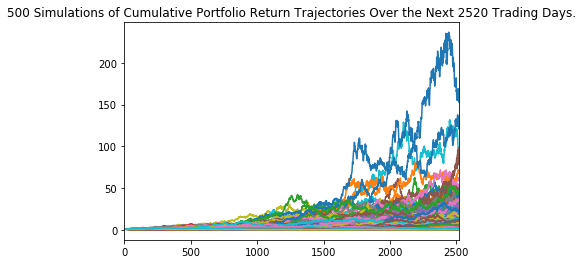

In [26]:
line_plot_stld = MC_stocks_stld.plot_simulation()

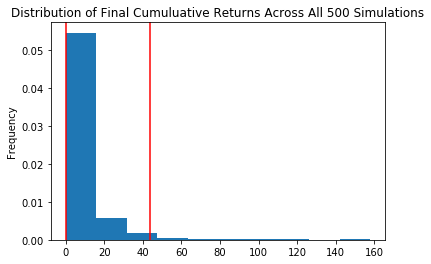

In [27]:
bar_plot_stld = MC_stocks_stld.plot_distribution()

In [28]:
stocks_tbl_stld = MC_stocks_stld.summarize_cumulative_return()

print(stocks_tbl_stld)

count           500.000000
mean              8.495556
std              14.461773
min               0.086559
25%               1.666614
50%               4.151409
75%               9.990624
max             157.837533
95% CI Lower      0.256992
95% CI Upper     43.752508
Name: 2520, dtype: float64


In [29]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100000
ci_lower_stld = round(stocks_tbl_stld[8]*initial_investment,2)
ci_upper_stld = round(stocks_tbl_stld[9]*initial_investment,2)

potential_gain_stld = round(((ci_upper_stld - initial_investment)/initial_investment)*100,2)  

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_stld} and ${ci_upper_stld}"
      f" for a potential gain of {potential_gain_stld}" "%" )

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $25699.22 and $4375250.79 for a potential gain of 4275.25%


In [30]:
# Get 5 years' worth of historical data for AA
ticker_aa = ["AA"]
timeframe = "1D"

# Display sample data
aa_data = api.get_barset(
    ticker_aa,
    timeframe,
    start = start_date,
    end = end_date
).df

MC_stocks_aa = MCSimulation(
    portfolio_data = aa_data,
    weights = [1.0],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_stocks_aa.portfolio_data.head()

AA                                            
                            open   high    low  close    volume daily_return
time                                                                        
2015-11-11 00:00:00-05:00  25.14  25.41  24.24  24.24  10523889          NaN
2015-11-12 00:00:00-05:00  24.00  24.01  23.43  23.46  12106521    -0.032178
2015-11-13 00:00:00-05:00  23.55  24.18  23.46  23.97   8234373     0.021739
2015-11-16 00:00:00-05:00  23.91  24.93  23.88  24.84  10355391     0.036295
2015-11-17 00:00:00-05:00  24.99  25.38  24.72  24.81   9387583    -0.001208

In [31]:
MC_stocks_aa.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.971382  0.996242  1.025199  0.976425  0.971736  0.994687  1.035857   
2     0.963123  0.965287  1.034186  0.969765  0.992132  1.049091  1.019726   
3     0.998563  0.978718  1.009554  0.959926  0.976261  1.045155  1.047440   
4     0.991342  0.974481  1.011933  0.963167  1.008370  1.008470  1.020485   
5     1.045609  0.952637  1.041131  0.917737  1.005198  1.016427  1.008562   
6     1.039119  0.953333  1.018692  0.892929  1.009601  1.032435  0.964703   
7     1.031475  0.926101  0.908001  0.890003  1.001925  1.016531  0.926820   
8     1.048531  0.904664  0.963021  0.870282  0.940906  1.027851  0.961901   
9     1.025053  0.914518  0.956624  0.874169  0.991459  1.040512  0.961721   
10    1.008585  0.881107  1.009666  0.826620  1.011729  1.053454  0.928892   
11    1.014521  0.912848  1.015019  0.835854  1.038745  1.039122  0.876659   
12    1.035954  0.872975  1.008522  0.856251  1.024741  1.057415  0.883789   
13    1.079954  0.904592  1.004181  0.810892  1.011759  1.109270  0.858907   
14    1.018243  0.882789  1.051580  0.792408  0.981952  1.141775  0.910487   
15    1.046065  0.869491  1.043467  0.809894  1.005314  1.104638  0.897420   
16    1.008288  0.834006  1.042189  0.823636  1.027044  1.148683  0.904916   
17    1.024835  0.817754  1.017531  0.807629  1.037226  1.182070  0.893769   
18    1.062674  0.797561  1.034832  0.782343  1.096625  1.183536  0.790379   
19    0.965699  0.772457  1.055474  0.795662  1.127915  1.222291  0.787456   
20    0.947669  0.824217  1.046805  0.808434  1.137564  1.177925  0.793494   
21    0.968086  0.840075  1.069226  0.807248  1.125996  1.203513  0.789299   
22    0.982164  0.845008  1.121157  0.796357  1.083362  1.181821  0.772744   
23    1.010793  0.840147  1.161749  0.813805  1.076733  1.132167  0.742467   
24    1.038130  0.830407  1.161404  0.797092  1.043478  1.063397  0.728912   
25    1.036297  0.830345  1.125648  0.798605  0.968354  1.073971  0.702686   
26    1.053347  0.837028  1.134142  0.805185  1.000578  1.027649  0.686556   
27    1.072000  0.793298  1.165509  0.742932  1.038282  1.015305  0.662786   
28    1.119033  0.792014  1.184518  0.754878  0.980144  1.026423  0.655235   
29    1.091822  0.779744  1.177514  0.736018  0.993718  1.042155  0.647131   
...        ...       ...       ...       ...       ...       ...       ...   
2491  0.159568  1.543890  5.422494  0.086167  0.022465  3.328773  0.138749   
2492  0.167066  1.601644  5.900025  0.083169  0.022860  3.409734  0.133257   
2493  0.164766  1.587592  5.939825  0.089401  0.022999  3.424126  0.137378   
2494  0.170653  1.543916  6.058883  0.088310  0.022551  3.398522  0.134194   
2495  0.161312  1.533803  6.223580  0.088444  0.023064  3.462801  0.128814   
2496  0.160988  1.464475  6.626105  0.092657  0.023807  3.500962  0.119324   
2497  0.167607  1.446974  6.589538  0.096047  0.025603  3.402981  0.123556   
2498  0.169170  1.495835  6.474353  0.091517  0.025270  3.321583  0.115911   
2499  0.167752  1.398465  6.769494  0.095632  0.025747  3.312293  0.119219   
2500  0.160820  1.357135  6.515973  0.094485  0.027137  3.326215  0.122417   
2501  0.157191  1.357599  7.058111  0.092008  0.027415  3.413241  0.118280   
2502  0.157047  1.391718  7.271794  0.091665  0.027171  3.490944  0.115246   
2503  0.150878  1.353971  7.820746  0.091443  0.026181  3.145992  0.116017   
2504  0.150602  1.384981  8.154012  0.090796  0.025341  3.096516  0.114054   
2505  0.153169  1.407011  7.642956  0.090259  0.025881  3.178207  0.110865   
2506  0.155051  1.385135  7.367651  0.092512  0.025434  3.174338  0.113769   
2507  0.160047  1.434074  6.827644  0.091243  0.025327  3.146343  0.108800   
2508  0.161278  1.412480  6.755591  0.087864  0.025565  3.213474  0.107451   
2509  0.162727  1.400057  6.511840  0.094561  0.025557  3.282523  0.106248   
2510  0.159765  1.350674  6.29839

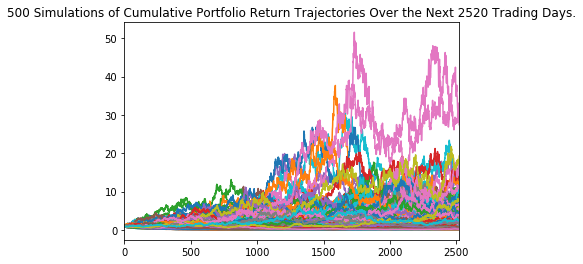

In [32]:
line_plot_aa = MC_stocks_aa.plot_simulation()

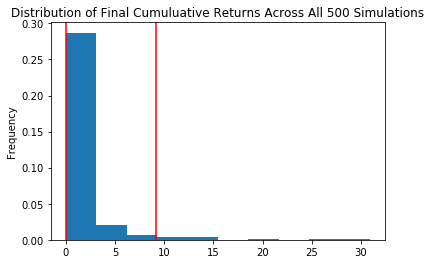

In [33]:
bar_plot_aa = MC_stocks_aa.plot_distribution()

In [34]:
stocks_tbl_aa = MC_stocks_aa.summarize_cumulative_return()

print(stocks_tbl_aa)

count           500.000000
mean              1.358950
std               2.971469
min               0.004499
25%               0.125134
50%               0.362088
75%               1.202459
max              30.939637
95% CI Lower      0.014605
95% CI Upper      9.179640
Name: 2520, dtype: float64


In [35]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100000
ci_lower_aa = round(stocks_tbl_aa[8]*initial_investment,2)
ci_upper_aa = round(stocks_tbl_aa[9]*initial_investment,2)

potential_gain_aa = round(((ci_upper_aa - initial_investment)/initial_investment)*100,2)  

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_aa} and ${ci_upper_aa}"
      f" for a potential gain of {potential_gain_aa}" "%" )

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $1460.51 and $917964.0 for a potential gain of 817.96%


In [36]:
# Get 5 years' worth of historical data for WPM
ticker_wpm = ["WPM"]
timeframe = "1D"

# Display sample data
wpm_data = api.get_barset(
    ticker_wpm,
    timeframe,
    start = start_date,
    end = end_date
).df

MC_stocks_wpm = MCSimulation(
    portfolio_data = wpm_data,
    weights = [1.0],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_stocks_wpm.portfolio_data.head()

WPM                                             
                            open    high     low  close   volume daily_return
time                                                                         
2015-11-11 00:00:00-05:00  12.50  12.530  12.140  12.36  3470730          NaN
2015-11-12 00:00:00-05:00  12.31  12.690  12.166  12.35  3863276    -0.000809
2015-11-13 00:00:00-05:00  12.33  12.490  12.210  12.40  2871500     0.004049
2015-11-16 00:00:00-05:00  12.44  12.701  12.385  12.52  2829076     0.009677
2015-11-17 00:00:00-05:00  12.46  12.480  11.910  12.08  3704829    -0.035144

In [37]:
MC_stocks_wpm.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0           1          2         3          4          5    \
0     1.000000    1.000000   1.000000  1.000000   1.000000   1.000000   
1     1.032962    0.951515   1.003991  0.987410   0.967976   0.990219   
2     1.002841    0.952734   1.003237  1.012774   0.956006   1.019183   
3     0.978614    0.966597   1.000674  1.014211   0.969384   0.990086   
4     1.009748    0.971735   0.956716  0.987307   0.989244   1.004344   
5     1.005006    0.978690   0.902853  1.032056   0.971462   1.031786   
6     1.013770    0.971830   0.894304  1.024809   0.962148   1.047042   
7     1.017663    0.981919   0.887801  1.039304   0.926169   1.048088   
8     1.012720    0.997997   0.900815  1.029262   0.934343   0.984885   
9     1.010549    1.020568   0.864967  0.992440   0.940078   0.966879   
10    1.017582    1.016363   0.842316  0.953191   0.943707   0.960043   
11    0.952163    1.038168   0.870511  0.942095   0.925442   0.998806   
12    0.949229    1.019719   0.859881  0.959276   0.950116   1.026364   
13    0.945929    1.047411   0.937524  0.984048   0.979787   1.002993   
14    0.980725    1.039132   0.929100  1.015564   0.993884   1.029357   
15    0.961058    1.024712   0.946823  0.987409   1.004195   1.027502   
16    0.961866    1.022539   0.957642  1.002637   1.037772   1.056764   
17    0.971846    1.035978   0.943477  0.970138   1.083234   1.040635   
18    0.979597    1.005600   0.944792  0.940106   1.076643   1.007306   
19    0.949581    0.992140   0.971732  0.954019   1.095290   1.027556   
20    0.934113    1.015474   1.012618  0.956358   1.134245   0.984041   
21    0.918195    1.023077   1.062097  0.977628   1.129405   1.026026   
22    0.881829    1.018656   1.028593  0.968796   1.163385   1.043109   
23    0.867267    1.062380   1.038197  0.982978   1.168550   1.091933   
24    0.863964    1.091558   1.045037  0.990286   1.137154   1.074897   
25    0.851028    1.105709   1.056444  0.974654   1.117226   1.101015   
26    0.805491    1.141457   1.037397  0.979839   1.149850   1.100078   
27    0.828820    1.102494   1.004322  1.018405   1.188883   1.089156   
28    0.796714    1.186332   1.018058  1.045840   1.229570   1.077832   
29    0.780856    1.131964   1.006760  1.086092   1.242372   1.077821   
...        ...         ...        ...       ...        ...        ...   
2491  3.866909  110.874380  15.563582  2.890146  21.902628  14.991953   
2492  3.828989  112.367111  15.220478  2.908707  22.563263  15.275982   
2493  3.995018  117.394600  15.173418  2.821080  21.769079  15.154943   
2494  3.960670  123.644743  14.937650  2.918077  21.587635  15.129388   
2495  3.993924  121.262625  14.477910  2.964958  21.721272  15.351992   
2496  3.939266  118.781556  14.553022  2.858613  21.851325  15.787880   
2497  4.016862  118.164668  13.852225  2.969034  21.302501  15.807313   
2498  4.197911  121.213356  13.362824  2.973445  22.743065  15.921045   
2499  4.051225  126.417801  13.920545  2.916709  22.862519  16.047838   
2500  4.110243  128.560944  14.030626  2.974536  22.812172  16.616976   
2501  4.024344  129.704425  13.473014  2.949235  22.730093  16.599633   
2502  4.106426  125.725672  13.880884  2.915790  23.708415  17.023517   
2503  4.111332  130.924919  14.030017  2.809716  24.197852  17.062226   
2504  4.066924  132.223897  13.839965  2.893767  24.224184  17.852566   
2505  4.052745  133.241574  14.250152  3.011418  24.168515  18.092592   
2506  4.030735  134.644728  14.783612  2.929685  24.437787  17.228749   
2507  4.004024  133.912338  15.294927  2.815459  24.681717  17.340182   
2508  3.942983  135.125822  14.795086  2.778288  24.180007  17.848574   
2509  4.041998  137.719730  15.317440  2.797093  24.410328  18.081499   
2510  4.129214  140.235904  15.564434  2.816899  25.140794  17.233852   
2511  4.124901  139.557268  16.051215  2.793439  26.426559  16.916647   
2512  4.238086  138.092288  15.668001  2.729337  27.402979  16.620873   
2513  4.333951  140.883838  15.774387  2.838125  26.797162  16.288057

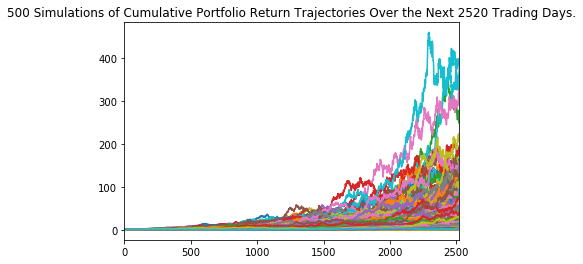

In [38]:
line_plot_wpm = MC_stocks_wpm.plot_simulation()

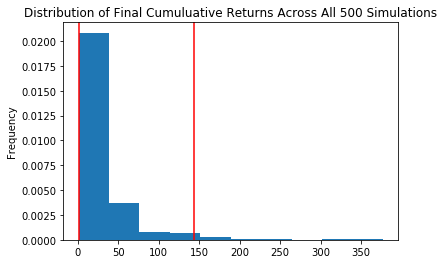

In [39]:
bar_plot_wpm = MC_stocks_wpm.plot_distribution()

In [40]:
stocks_tbl_wpm = MC_stocks_wpm.summarize_cumulative_return()

print(stocks_tbl_wpm)

count           500.000000
mean             29.406057
std              42.765852
min               0.658856
25%               6.804423
50%              15.654739
75%              34.200397
max             376.966801
95% CI Lower      1.358669
95% CI Upper    143.335789
Name: 2520, dtype: float64


In [41]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100000
ci_lower_wpm = round(stocks_tbl_wpm[8]*initial_investment,2)
ci_upper_wpm = round(stocks_tbl_wpm[9]*initial_investment,2)

potential_gain_wpm = round(((ci_upper_wpm - initial_investment)/initial_investment)*100,2)  

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_wpm} and ${ci_upper_wpm}"
      f" for a potential gain of {potential_gain_wpm}" "%" )

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $135866.89 and $14333578.89 for a potential gain of 14233.58%


In [42]:
# Get 5 years' worth of historical data for SCCO
ticker_scco = ["SCCO"]
timeframe = "1D"

# Display sample data
scco_data = api.get_barset(
    ticker_scco,
    timeframe,
    start = start_date,
    end = end_date
).df

MC_stocks_scco = MCSimulation(
    portfolio_data = scco_data,
    weights = [1.0],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_stocks_scco.portfolio_data.head()

SCCO                                           
                            open   high    low  close   volume daily_return
time                                                                       
2015-11-11 00:00:00-05:00  26.90  26.98  26.35  26.63  1034435          NaN
2015-11-12 00:00:00-05:00  26.16  26.39  25.92  26.18  1598809    -0.016898
2015-11-13 00:00:00-05:00  26.29  26.42  25.88  26.11  1375274    -0.002674
2015-11-16 00:00:00-05:00  26.09  26.31  25.69  25.79  1577340    -0.012256
2015-11-17 00:00:00-05:00  25.80  25.80  25.12  25.61  1898401    -0.006979

In [43]:
MC_stocks_scco.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3           4         5         6    \
0      1.000000  1.000000  1.000000  1.000000    1.000000  1.000000  1.000000   
1      1.010136  1.000408  0.970858  1.020266    1.021438  1.007426  1.010683   
2      1.047742  1.016833  0.970492  1.011613    1.043630  1.008076  1.020783   
3      1.080393  0.969996  0.953425  1.001277    1.027742  0.976890  1.033690   
4      1.066512  0.951030  0.930285  0.976941    0.988091  0.939893  0.996002   
5      1.036785  0.961257  0.924150  1.022795    1.011233  0.926114  1.005052   
6      1.009743  0.969865  0.931029  1.000669    0.988441  0.945293  1.002116   
7      1.000416  0.977374  0.929864  1.003041    0.981668  0.939463  1.000033   
8      0.998408  0.962823  0.886158  1.000703    0.990370  0.939953  0.980953   
9      0.990802  0.926742  0.925170  1.043717    0.961464  0.966868  0.955671   
10     0.981821  0.944148  0.901635  1.041371    0.962231  0.933123  0.932491   
11     0.983048  0.966129  0.867392  1.010869    0.939173  0.925834  0.962854   
12     1.009110  0.965336  0.854161  1.030058    0.955313  0.913793  0.988758   
13     1.002388  0.965369  0.870888  1.027385    0.950619  0.903926  0.976665   
14     0.974662  0.925503  0.883208  1.014079    0.933219  0.910022  1.007421   
15     0.991951  0.908237  0.914852  1.007196    0.910445  0.873177  1.032376   
16     1.009553  0.901148  0.929748  1.003047    0.911016  0.860037  0.994711   
17     1.031266  0.909654  0.934168  1.002288    0.903855  0.823019  0.968516   
18     1.014320  0.906967  0.922385  1.009104    0.905333  0.858521  0.967933   
19     0.971637  0.876233  0.918077  1.001513    0.911591  0.838460  1.002357   
20     0.971936  0.857042  0.896500  0.984710    0.894346  0.861391  0.988669   
21     0.961045  0.834776  0.865484  0.987018    0.904592  0.860958  0.992297   
22     0.952011  0.849076  0.856718  0.999108    0.952797  0.886908  0.972724   
23     0.941884  0.864474  0.842452  1.016302    0.941974  0.920276  0.948490   
24     0.936292  0.844587  0.865988  1.055790    0.961024  0.928407  0.990872   
25     0.940933  0.824273  0.875722  1.087295    0.946763  0.926378  0.978005   
26     0.932167  0.797829  0.870866  1.115670    0.943790  0.920220  0.968745   
27     0.900798  0.801950  0.859257  1.118792    0.955650  0.905432  0.949866   
28     0.885134  0.822946  0.849149  1.133523    0.938304  0.959611  0.946410   
29     0.902824  0.826085  0.833706  1.109304    0.916281  0.995164  0.980258   
...         ...       ...       ...       ...         ...       ...       ...   
2491  20.368168  6.764503  7.081185  8.262891  129.211423  1.894250  2.060388   
2492  20.794315  6.688281  7.232263  8.144562  130.077131  1.884129  2.140144   
2493  20.888140  6.727867  7.462498  8.164612  127.332265  1.832909  2.178259   
2494  21.051864  6.563025  6.992320  8.041855  123.999510  1.828294  2.131265   
2495  20.277958  6.552256  6.960006  8.043220  124.949373  1.839642  2.160708   
2496  20.376608  6.444689  7.056698  8.007516  123.771445  1.902572  2.086028   
2497  19.692587  6.710455  7.220246  8.220253  122.352270  1.852573  2.052455   
2498  18.855024  6.493783  7.379883  8.239279  124.533777  1.836591  2.050536   
2499  18.673638  6.487908  7.360418  8.041369  122.381240  1.786173  2.006294   
2500  19.071354  6.597980  7.386252  8.208154  124.572794  1.754865  2.006747   
2501  18.781326  6.542354  7.386148  8.227446  118.131900  1.841405  2.073424   
2502  18.999912  6.794759  7.381469  8.363434  118.687260  1.894533  2.101785   
2503  19.482034  6.747575  7.671911  8.386711  118.266472  1.892791  2.142722   
2504  19.360452  6.579941  7.846133  8.598343  119.857226  1.925984  2.212522   
2505  20.116394  6.556358  7.748980  8.681370  115.116758  1.958037  2.313757   
2506  20.851492  6.654027  8.009897  8.797909  114.846013  1.932001  2.290917   
2507  21.509101  6.785129  7.885117  8.671784  115.540245  1.864245  2.231781   
2508  21.115971  6.996937  8.169148  8.7244

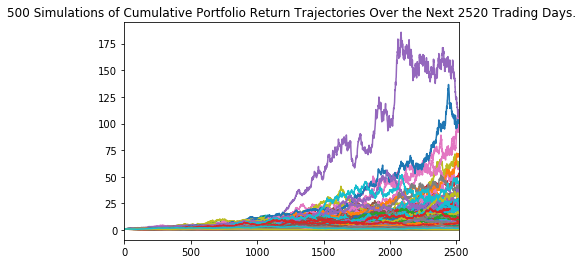

In [44]:
line_plot_scco = MC_stocks_scco.plot_simulation()

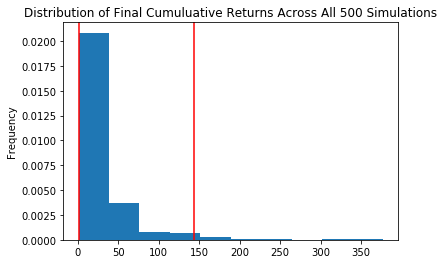

In [45]:
bar_plot_scco = MC_stocks_wpm.plot_distribution()

In [46]:
stocks_tbl_scco = MC_stocks_scco.summarize_cumulative_return()

print(stocks_tbl_scco)

count           500.000000
mean              7.577039
std              12.122232
min               0.175699
25%               2.100819
50%               3.967187
75%               8.116677
max             107.724930
95% CI Lower      0.510603
95% CI Upper     36.154959
Name: 2520, dtype: float64


In [47]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100000
ci_lower_scco = round(stocks_tbl_scco[8]*initial_investment,2)
ci_upper_scco = round(stocks_tbl_scco[9]*initial_investment,2)

potential_gain_scco = round(((ci_upper_scco - initial_investment)/initial_investment)*100,2)  

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_scco} and ${ci_upper_scco}"
      f" for a potential gain of {potential_gain_scco}" "%" )

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $51060.29 and $3615495.89 for a potential gain of 3515.5%


In [48]:
# Get 5 years' worth of historical data for ALB
ticker_alb = ["ALB"]
timeframe = "1D"

# Display sample data
alb_data = api.get_barset(
    ticker_alb,
    timeframe,
    start = start_date,
    end = end_date
).df

MC_stocks_alb = MCSimulation(
    portfolio_data = alb_data,
    weights = [1.0],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_stocks_alb.portfolio_data.head()

ALB                                    \
                            open     high     low   close   volume   
time                                                                 
2015-11-11 00:00:00-05:00  49.85  49.9875  48.440  48.900  1146171   
2015-11-12 00:00:00-05:00  48.14  48.8600  46.850  46.910  1118680   
2015-11-13 00:00:00-05:00  46.75  48.2400  46.490  47.600  1763957   
2015-11-16 00:00:00-05:00  47.43  48.0700  47.020  47.980   727628   
2015-11-17 00:00:00-05:00  48.11  48.9275  47.665  48.525  1251270   

                                        
                          daily_return  
time                                    
2015-11-11 00:00:00-05:00          NaN  
2015-11-12 00:00:00-05:00    -0.040695  
2015-11-13 00:00:00-05:00     0.014709  
2015-11-16 00:00:00-05:00     0.007983  
2015-11-17 00:00:00-05:00     0.011359

In [49]:
MC_stocks_alb.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.984323  1.008454  1.002790  0.968938  1.016996  1.002008  0.975242   
2     0.989886  1.016084  1.006863  0.987112  1.058498  0.998423  0.972644   
3     0.996952  1.004201  1.020297  1.014675  1.070585  0.986733  0.966279   
4     1.058827  0.988839  1.047019  1.036201  1.042662  1.008324  0.963125   
5     1.061406  1.076706  1.047102  1.019108  1.004482  1.014227  0.956888   
6     1.073145  1.072215  1.020838  1.035072  1.069832  1.028083  0.934597   
7     1.096067  1.076483  0.984495  1.024241  1.039175  1.072256  0.951531   
8     1.131536  1.121295  0.975676  1.070010  1.033173  1.136229  0.922931   
9     1.134199  1.147023  0.963324  1.065375  1.008144  1.102881  0.930244   
10    1.137205  1.117485  0.995453  1.074369  0.987296  1.130801  0.897913   
11    1.125168  1.187043  0.997473  1.083339  0.974997  1.104194  0.910369   
12    1.157863  1.126668  1.013015  1.059789  0.940054  1.135656  0.968218   
13    1.151984  1.150450  0.996657  1.027062  0.916336  1.096958  0.957692   
14    1.238004  1.159563  1.010253  1.029938  0.875013  1.063760  0.937074   
15    1.213530  1.151634  1.046219  1.014430  0.863508  1.089199  0.966330   
16    1.184707  1.142629  1.043303  0.984909  0.877690  1.098718  1.011830   
17    1.148759  1.185606  1.015150  1.006186  0.841885  1.040310  1.058616   
18    1.158316  1.233385  1.005158  1.046666  0.848426  1.125432  1.065186   
19    1.169881  1.206804  1.007716  1.007358  0.854156  1.093676  1.083939   
20    1.181793  1.187760  0.995044  1.011139  0.867157  1.081748  1.112002   
21    1.185174  1.211974  1.002965  1.026611  0.845577  1.038459  1.125422   
22    1.216715  1.240363  1.037966  1.026704  0.842457  1.034139  1.161038   
23    1.271085  1.237108  1.012898  1.049855  0.860827  1.033613  1.159607   
24    1.278384  1.193529  0.976570  1.028373  0.839486  1.071539  1.156577   
25    1.261498  1.200199  0.909288  0.992873  0.834783  1.078901  1.148426   
26    1.289445  1.161531  0.850778  1.003653  0.791515  1.045991  1.171543   
27    1.272869  1.172468  0.789424  0.975062  0.759744  1.036627  1.140529   
28    1.264144  1.164726  0.792616  0.989546  0.780936  1.000215  1.147117   
29    1.369002  1.136476  0.783339  0.984690  0.801216  0.985107  1.177430   
...        ...       ...       ...       ...       ...       ...       ...   
2491  7.506174  6.813532  2.716336  6.597358  2.077170  1.635232  1.260927   
2492  7.383561  6.805700  2.647053  6.701584  2.111188  1.584302  1.244308   
2493  7.240622  6.659350  2.609422  6.671624  2.108392  1.568396  1.234198   
2494  7.153092  6.768986  2.531594  6.670469  2.131261  1.614711  1.274713   
2495  7.165909  7.135964  2.649063  6.884640  2.141456  1.691321  1.302462   
2496  7.208065  7.283511  2.627043  6.557890  2.087523  1.724275  1.364904   
2497  7.046068  7.205771  2.520131  6.451238  2.104919  1.704448  1.419245   
2498  7.099821  7.351597  2.523912  6.325258  2.053997  1.668818  1.395441   
2499  7.095622  7.128280  2.514791  6.520242  1.992228  1.664938  1.384319   
2500  7.309497  7.266754  2.575376  6.446551  2.012173  1.678081  1.350155   
2501  7.193064  7.303359  2.728935  6.485795  2.011806  1.678092  1.387066   
2502  7.200233  7.217671  2.704649  6.663912  1.961770  1.754802  1.377377   
2503  7.257761  7.318571  2.720635  6.779747  2.001610  1.784039  1.327390   
2504  7.212375  7.271072  2.646281  6.966913  1.979158  1.720843  1.337188   
2505  7.378290  7.272023  2.636715  7.069308  1.988892  1.718971  1.240702   
2506  7.308700  7.643305  2.652977  7.132473  1.952054  1.712879  1.257270   
2507  7.195580  7.479823  2.493892  7.083285  1.931713  1.741552  1.269447   
2508  7.213090  7.433277  2.421707  7.318470  1.885394  1.752438  1.307378   
2509  7.337055  7.717907  2.584129  7.275982  1.923546  1.787460  1.307859   
2510  7.377623  7.860529  2.65017

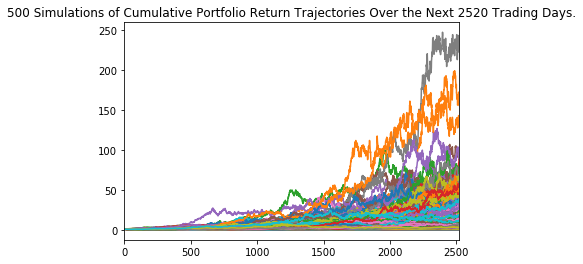

In [50]:
line_plot_alb = MC_stocks_alb.plot_simulation()

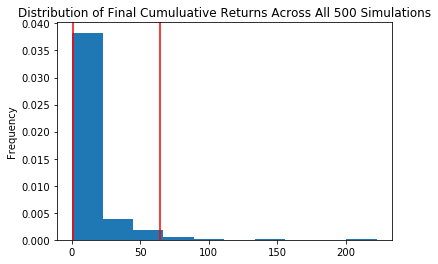

In [51]:
bar_plot_alb = MC_stocks_alb.plot_distribution()

In [52]:
stocks_tbl_alb = MC_stocks_alb.summarize_cumulative_return()

print(stocks_tbl_alb)

count           500.000000
mean             12.256242
std              19.736921
min               0.133779
25%               2.427396
50%               5.399704
75%              12.884090
max             222.669088
95% CI Lower      0.529388
95% CI Upper     64.060258
Name: 2520, dtype: float64


In [53]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100000
ci_lower_alb = round(stocks_tbl_alb[8]*initial_investment,2)
ci_upper_alb = round(stocks_tbl_alb[9]*initial_investment,2)

potential_gain_alb = round(((ci_upper_alb - initial_investment)/initial_investment)*100,2)  
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_alb} and ${ci_upper_alb}"
      f" for a potential gain of {potential_gain_alb}" "%" )

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $52938.79 and $6406025.78 for a potential gain of 6306.03%


In [54]:
# Get 5 years' worth of historical data for NEM
ticker_nem = ["NEM"]
timeframe = "1D"

# Display sample data
nem_data = api.get_barset(
    ticker_nem,
    timeframe,
    start = start_date,
    end = end_date
).df

MC_stocks_nem = MCSimulation(
    portfolio_data = nem_data,
    weights = [1.0],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_stocks_nem.portfolio_data.head()

NEM                                            
                            open    high    low  close   volume daily_return
time                                                                        
2015-11-11 00:00:00-05:00  17.59  17.830  17.44  17.79  3736052          NaN
2015-11-12 00:00:00-05:00  17.34  17.870  17.08  17.33  6834624    -0.025857
2015-11-13 00:00:00-05:00  17.33  17.510  17.23  17.50  4171195     0.009810
2015-11-16 00:00:00-05:00  17.59  17.905  17.50  17.63  5383804     0.007429
2015-11-17 00:00:00-05:00  17.51  17.670  16.65  16.87  7574780    -0.043108

In [55]:
MC_stocks_nem.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2         3          4          5    \
0     1.000000   1.000000   1.000000  1.000000   1.000000   1.000000   
1     1.034180   1.026890   0.989190  1.042201   0.986861   0.979156   
2     1.009988   1.002513   0.977445  1.039810   1.006889   1.015556   
3     1.013525   0.974702   1.003889  1.051780   0.981839   1.038594   
4     0.972571   0.981012   1.032140  1.116970   0.996580   1.092496   
5     0.951378   0.970177   1.010159  1.175530   1.023317   1.098558   
6     0.952668   0.989652   1.011022  1.201459   0.995175   1.128796   
7     0.935217   0.990445   1.048134  1.173021   0.980700   1.076306   
8     0.924375   0.983366   1.077704  1.180425   0.978005   1.084243   
9     0.931647   0.990226   1.119297  1.140841   0.987706   1.106329   
10    0.901977   1.000518   1.108623  1.132924   0.970513   1.136587   
11    0.894738   1.009360   1.062772  1.170612   0.932767   1.128847   
12    0.909896   1.001999   1.039524  1.214590   0.909069   1.176535   
13    0.896712   1.044960   1.039484  1.223640   0.916301   1.156103   
14    0.884024   1.071801   0.995538  1.207293   0.926878   1.164424   
15    0.905538   0.981489   0.966549  1.225679   0.961089   1.160418   
16    0.923927   0.978890   0.958539  1.225684   0.989072   1.188085   
17    0.939105   0.966685   0.969550  1.242910   0.986766   1.206002   
18    0.928305   0.974077   0.986163  1.237952   1.000927   1.247412   
19    0.921023   0.959878   0.978775  1.264137   0.969356   1.219391   
20    0.891691   0.985718   0.941837  1.279250   0.957033   1.171940   
21    0.913890   1.008250   0.939605  1.317394   0.966055   1.194579   
22    0.932353   1.027289   0.932580  1.368924   0.986923   1.180063   
23    0.938181   1.025995   0.933811  1.404188   1.005123   1.208479   
24    0.911308   1.029306   0.914202  1.398609   1.016642   1.116581   
25    0.885882   1.002679   0.883130  1.348886   1.014340   1.133277   
26    0.879572   1.005771   0.903665  1.367221   1.037282   1.102982   
27    0.875995   1.018651   0.929674  1.393322   1.038067   1.067570   
28    0.872555   1.027386   0.918682  1.389352   1.051278   1.032324   
29    0.881177   1.025664   0.945584  1.410821   1.016838   1.048228   
...        ...        ...        ...       ...        ...        ...   
2491  1.319205  40.722912  79.200460  4.048637  22.639299  15.208224   
2492  1.332248  41.398834  79.941535  3.914538  23.695047  14.937573   
2493  1.318276  40.471230  79.338720  3.793452  23.451871  14.518514   
2494  1.301336  40.890287  79.865063  3.713255  23.116074  14.267895   
2495  1.312777  41.331663  78.941758  3.651194  23.455163  14.402802   
2496  1.294509  41.301359  81.655279  3.668514  23.297887  14.453526   
2497  1.325089  40.903051  82.943486  3.738403  23.093324  14.381535   
2498  1.373864  40.939186  82.267360  3.751675  22.128625  14.753202   
2499  1.346343  40.826259  79.634362  3.811006  21.916963  15.287073   
2500  1.374775  40.870460  82.962243  3.710004  21.250805  16.323853   
2501  1.356454  40.440067  83.785762  3.634791  21.616935  16.546174   
2502  1.417201  40.582865  86.695583  3.557105  22.247696  16.469554   
2503  1.408702  40.752424  86.886624  3.390511  22.148672  16.065157   
2504  1.466537  39.728456  84.819318  3.320207  21.648832  16.141233   
2505  1.486375  38.240168  87.785207  3.261748  21.577813  16.550676   
2506  1.487711  36.612879  86.715180  3.134738  21.256978  16.745888   
2507  1.484798  36.553895  90.672109  3.181290  21.161468  16.836091   
2508  1.482023  36.207187  92.045250  3.242635  21.041547  16.983828   
2509  1.507300  37.492112  89.121186  3.250223  21.036369  16.987116   
2510  1.475067  36.664866  91.239024  3.323587  20.619525  17.443074   
2511  1.486062  38.179282  91.855030  3.348115  21.081634  17.290178   
2512  1.454104  38.888035  93.130284  3.286996  20.556346  17.108168   
2513  1.501693  37.813733  93.214604  3.348595  20.092246  17.554068   
2514  1.529818  37.120442  96.640844  3.172270  19.

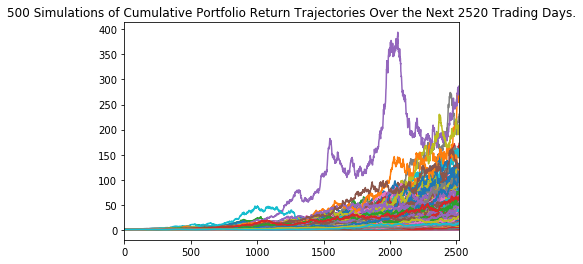

In [56]:
line_plot_nem = MC_stocks_nem.plot_simulation()

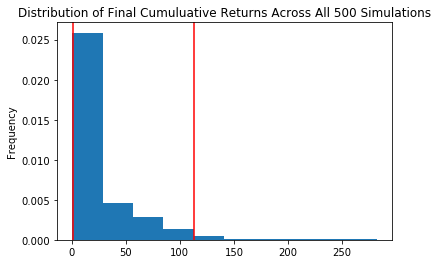

In [57]:
bar_plot_nem = MC_stocks_nem.plot_distribution()

In [58]:
stocks_tbl_nem = MC_stocks_nem.summarize_cumulative_return()

print(stocks_tbl_nem)

count           500.000000
mean             26.755802
std              34.576158
min               0.405894
25%               6.586483
50%              14.755754
75%              31.276917
max             281.854957
95% CI Lower      1.233345
95% CI Upper    113.073427
Name: 2520, dtype: float64


In [59]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100000
ci_lower_nem = round(stocks_tbl_nem[8]*initial_investment,2)
ci_upper_nem = round(stocks_tbl_nem[9]*initial_investment,2)

potential_gain_nem = round(((ci_upper_nem - initial_investment)/initial_investment)*100,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_nem} and ${ci_upper_nem}"
      f" for a potential gain of {potential_gain_nem}" "%" )

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $123334.54 and $11307342.71 for a potential gain of 11207.34%


In [60]:
# Get 5 years' worth of historical data for HL
ticker_hl = ["HL"]
timeframe = "1D"

# Display sample data
hl_data = api.get_barset(
    ticker_hl,
    timeframe,
    start = start_date,
    end = end_date
).df

MC_stocks_hl = MCSimulation(
    portfolio_data = hl_data,
    weights = [1.0],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_stocks_hl.portfolio_data.head()

HL                                   \
                             open    high     low   close   volume   
time                                                                 
2015-11-11 00:00:00-05:00  1.8843  1.9140  1.8545  1.8644  3969488   
2015-11-12 00:00:00-05:00  1.8249  1.9038  1.8249  1.8545  3763133   
2015-11-13 00:00:00-05:00  1.8347  1.9200  1.8347  1.8743  3517490   
2015-11-16 00:00:00-05:00  1.9138  1.9836  1.9038  1.9537  4375371   
2015-11-17 00:00:00-05:00  1.9164  1.9460  1.8077  1.8176  6812336   

                                        
                          daily_return  
time                                    
2015-11-11 00:00:00-05:00          NaN  
2015-11-12 00:00:00-05:00    -0.005310  
2015-11-13 00:00:00-05:00     0.010677  
2015-11-16 00:00:00-05:00     0.042362  
2015-11-17 00:00:00-05:00    -0.069663

In [61]:
MC_stocks_hl.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1           2         3         4         5         6    \
0     1.000000  1.000000    1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.001563  1.051846    1.031117  0.943196  1.007560  1.003769  1.018495   
2     0.931269  1.053037    1.029275  0.942141  0.996045  0.987262  1.043720   
3     0.923999  1.052863    1.003936  0.993275  0.977839  1.022514  1.001658   
4     0.951583  1.030414    0.975664  0.927274  1.082876  1.066286  0.999303   
5     0.924025  1.024965    0.921180  0.921336  1.062128  1.050392  0.978655   
6     0.860997  1.065920    0.874561  0.903673  1.116642  1.005937  0.987749   
7     0.836395  1.015048    0.913010  0.833458  1.030255  0.937095  0.922781   
8     0.862162  1.060769    0.870650  0.855701  1.077549  0.985402  0.906700   
9     0.787174  1.072924    0.912974  0.837750  1.065976  0.960703  0.881907   
10    0.755053  0.998334    0.959305  0.863315  1.077207  0.946195  0.937687   
11    0.808405  0.961927    0.939653  0.909448  1.099958  1.014049  0.979327   
12    0.806859  0.959809    0.881207  0.882693  1.154721  1.045133  0.906811   
13    0.799557  0.972418    0.865119  0.857496  1.168134  1.058966  0.907361   
14    0.776814  0.971962    0.871913  0.821069  1.156750  1.043388  0.896475   
15    0.784730  0.975231    0.893548  0.871152  1.134758  1.091265  0.874493   
16    0.809467  1.003119    0.972298  0.961277  1.129352  1.100614  0.861985   
17    0.825213  1.035999    0.991529  0.974319  1.100885  1.149175  0.880960   
18    0.923658  1.061283    0.955126  1.068516  1.112201  1.112126  0.851313   
19    0.906876  1.106502    0.950467  1.024789  1.089555  1.149504  0.814368   
20    0.836727  1.092123    0.942885  0.989053  1.137356  1.054642  0.811908   
21    0.853779  1.037310    0.858319  1.026352  1.217018  0.979231  0.840369   
22    0.833964  1.010631    0.853969  1.018561  1.177976  1.041655  0.836885   
23    0.849895  0.904585    0.899290  1.018429  1.130177  1.049307  0.802137   
24    0.855538  0.902042    0.927092  0.964515  1.108417  1.046029  0.802943   
25    0.780478  0.840157    1.000691  0.927089  1.157572  1.077671  0.814028   
26    0.822885  0.883781    1.013375  1.003658  1.145769  1.096658  0.776390   
27    0.823042  0.860789    0.980316  0.979473  1.206666  1.185441  0.774772   
28    0.861610  0.861472    1.026567  0.970622  1.173077  1.220166  0.771854   
29    0.763077  0.886268    1.008663  0.974676  1.178304  1.282349  0.798688   
...        ...       ...         ...       ...       ...       ...       ...   
2491  2.226822  2.399155  152.259110  0.366692  3.764669  6.517059  0.757666   
2492  2.218043  2.430152  159.606686  0.364283  3.919486  6.405932  0.758647   
2493  2.229802  2.479189  163.051357  0.328638  3.723162  6.134034  0.746107   
2494  2.164396  2.458957  167.489683  0.334247  3.632808  6.273280  0.759198   
2495  2.169406  2.598235  164.011507  0.327325  3.925068  6.119734  0.740047   
2496  2.374577  2.688172  162.699206  0.318101  3.754749  6.042803  0.785934   
2497  2.222297  2.421450  152.513874  0.316491  3.922463  5.636030  0.819699   
2498  2.041977  2.415752  150.544428  0.311474  3.801246  5.773208  0.803107   
2499  2.041760  2.541726  155.783967  0.313470  3.939972  5.976537  0.811480   
2500  2.060352  2.682469  151.394248  0.306419  3.959109  5.707482  0.799242   
2501  2.257876  2.657556  152.435433  0.307840  3.907592  5.909317  0.801740   
2502  2.423284  2.396830  150.360360  0.322311  3.871955  5.857822  0.822279   
2503  2.469753  2.389696  142.400789  0.318795  3.808625  5.584276  0.804909   
2504  2.583187  2.332797  148.822147  0.301846  3.674381  5.624966  0.814333   
2505  2.560250  2.262442  150.697309  0.311380  3.674553  5.884550  0.839136   
2506  2.577452  2.338495  154.274888  0.323175  3.839845  5.823678  0.877115   
2507  2.733827  2.390673  150.609812  0.365512  3.829925  5.624505  0.870655   
2508  2.531584  2.473439  152.925229  0.370479  3.714267  5.777762  0.881271   
2509  2.572

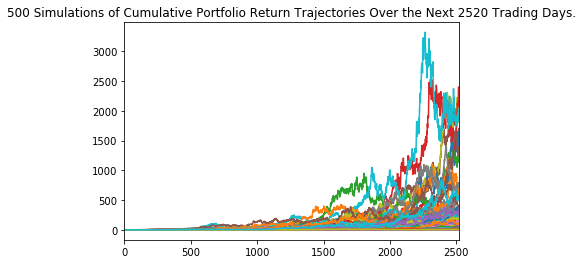

In [62]:
line_plot_hl = MC_stocks_hl.plot_simulation()

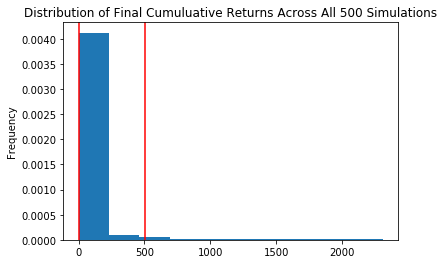

In [63]:
bar_plot_hl = MC_stocks_hl.plot_distribution()

In [64]:
stocks_tbl_hl = MC_stocks_hl.summarize_cumulative_return()

print(stocks_tbl_hl)

count            500.000000
mean              62.302727
std              214.226795
min                0.037598
25%                1.989653
50%                7.919250
75%               31.720146
max             2308.620653
95% CI Lower       0.209619
95% CI Upper     506.457388
Name: 2520, dtype: float64


In [65]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100000
ci_lower_hl = round(stocks_tbl_hl[8]*initial_investment,2)
ci_upper_hl = round(stocks_tbl_hl[9]*initial_investment,2)

potential_gain_hl = round(((ci_upper_hl - initial_investment)/initial_investment)*100,2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_hl} and ${ci_upper_hl}"
      f" for a potential gain of {potential_gain_hl}" "%" )

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $20961.86 and $50645738.83 for a potential gain of 50545.74%


In [66]:
# Get 5 years' worth of historical data for CLF
ticker_clf = ["CLF"]
timeframe = "1D"

# Display sample data
clf_data = api.get_barset(
    ticker_clf,
    timeframe,
    start = start_date,
    end = end_date
).df

MC_stocks_clf = MCSimulation(
    portfolio_data = clf_data,
    weights = [1.0],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_stocks_clf.portfolio_data.head()

CLF                                          
                           open    high   low close   volume daily_return
time                                                                     
2015-11-11 00:00:00-05:00  3.29  3.3250  3.13  3.25  5389658          NaN
2015-11-12 00:00:00-05:00  3.15  3.1600  2.99  3.02  3344332    -0.070769
2015-11-13 00:00:00-05:00  3.01  3.0500  2.68  2.71  4998114    -0.102649
2015-11-16 00:00:00-05:00  2.72  2.8499  2.64  2.69  3297760    -0.007380
2015-11-17 00:00:00-05:00  2.71  2.7100  2.32  2.35  7714720    -0.126394

In [67]:
MC_stocks_clf.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1          2           3         4          5    \
0     1.000000  1.000000   1.000000    1.000000  1.000000   1.000000   
1     0.984461  0.988864   0.919228    1.021277  0.944139   0.970666   
2     0.952065  1.029473   0.942658    1.073275  0.948884   1.027131   
3     0.969253  0.917843   0.945810    1.040756  1.005340   1.040329   
4     0.971917  0.905959   0.979494    1.067541  1.058612   1.039229   
5     1.013823  1.004459   1.043231    1.144795  0.988614   1.115534   
6     1.055351  0.966285   1.117000    1.185989  0.950082   1.109179   
7     1.021820  0.958808   1.159968    1.219585  0.965818   1.097761   
8     1.036616  0.937550   1.149917    1.276374  0.961580   1.124161   
9     0.926051  0.915668   1.239115    1.345829  0.935253   1.131949   
10    0.901419  0.923450   1.222333    1.314164  0.898010   1.122768   
11    0.951317  0.965753   1.233292    1.391893  0.922872   1.178798   
12    0.903316  0.885176   1.313877    1.403758  0.894343   1.300030   
13    0.877489  0.901413   1.389006    1.356808  0.897776   1.241860   
14    0.856635  0.882126   1.415491    1.313785  0.924141   1.273447   
15    0.845763  0.908671   1.256654    1.290814  0.903152   1.246324   
16    0.921701  0.848394   1.299516    1.227166  0.914549   1.212291   
17    0.973917  0.879622   1.418464    1.198319  0.985987   1.275466   
18    1.008454  0.931572   1.444646    1.223826  0.975791   1.245165   
19    1.011371  0.957560   1.402617    1.209927  0.868096   1.238347   
20    0.935036  0.904367   1.342078    1.261512  0.831783   1.198908   
21    1.007271  0.942995   1.317561    1.236972  0.773185   1.205296   
22    1.052143  1.010115   1.297393    1.236787  0.757091   1.203657   
23    0.984958  1.064500   1.315314    1.278694  0.825326   1.270190   
24    0.988740  1.080028   1.256939    1.311103  0.854708   1.341031   
25    1.088520  1.030093   1.283875    1.227907  0.904445   1.311070   
26    1.095183  1.034075   1.279128    1.261249  0.931753   1.315663   
27    1.081228  1.091697   1.430402    1.286624  0.887946   1.309415   
28    1.090832  1.016922   1.479857    1.308279  0.883684   1.245362   
29    1.065545  1.025170   1.464541    1.242883  0.821259   1.348622   
...        ...       ...        ...         ...       ...        ...   
2491  2.988297  2.886097  21.044993  249.224142  0.040516  37.870208   
2492  3.092371  2.980237  21.620047  249.579295  0.039751  36.532543   
2493  3.300808  2.992079  23.049266  260.376528  0.039334  38.246375   
2494  3.420530  2.939404  24.515411  265.313162  0.040026  41.282090   
2495  3.352256  2.932641  24.981734  268.512113  0.038709  40.277573   
2496  3.395450  2.743551  24.745091  269.989829  0.041119  42.481853   
2497  3.631338  2.701399  23.780545  281.924758  0.041962  41.328798   
2498  3.724172  2.749290  25.584339  293.722600  0.040935  40.363737   
2499  3.667795  2.932815  25.956741  309.532793  0.040664  41.698801   
2500  3.758705  3.057774  25.410528  316.697559  0.040247  43.282947   
2501  3.958549  3.003830  27.332867  302.812386  0.041481  42.814568   
2502  3.858811  2.857598  29.400474  334.744507  0.043479  40.379378   
2503  3.473094  3.110643  28.365167  320.977955  0.043904  41.335679   
2504  3.516069  3.011087  27.973250  311.886251  0.041082  40.169112   
2505  3.613461  2.761107  28.138714  337.152216  0.039792  40.244653   
2506  3.561621  2.731602  27.424362  341.514559  0.036347  38.725211   
2507  3.521798  2.657670  29.142802  365.596461  0.036318  44.005602   
2508  3.393097  2.417576  28.678786  367.176875  0.037303  47.637444   
2509  3.568068  2.531433  29.363209  372.055475  0.038692  47.678284   
2510  3.817573  2.688632  28.664096  353.841371  0.037458  47.635274   
2511  3.819871  2.537433  30.877001  355.957294  0.036219  47.508893   
2512  4.065002  2.569762  30.061772  357.948918  0.038056  49.212370   
2513  4.568883  2.507654  29.468272  354.110279  0.037166  50.335308   
2514  4.525477  2.570976  31.767850  368.104218  0.

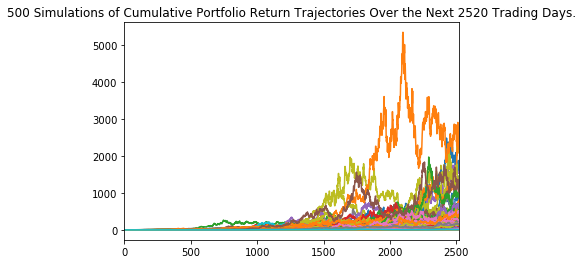

In [68]:
line_plot_clf = MC_stocks_clf.plot_simulation()

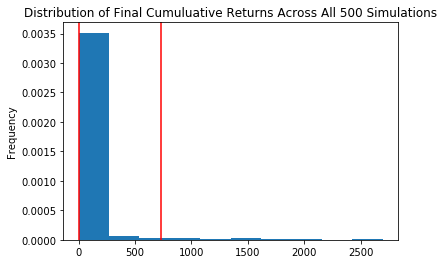

In [69]:
bar_plot_clf = MC_stocks_clf.plot_distribution()

In [70]:
stocks_tbl_clf = MC_stocks_clf.summarize_cumulative_return()

print(stocks_tbl_clf)

count            500.000000
mean              76.191364
std              264.646591
min                0.016311
25%                1.307702
50%                6.908854
75%               34.912742
max             2697.826292
95% CI Lower       0.076246
95% CI Upper     731.552066
Name: 2520, dtype: float64


In [71]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100000
ci_lower_clf = round(stocks_tbl_clf[8]*initial_investment,2)
ci_upper_clf = round(stocks_tbl_clf[9]*initial_investment,2)

potential_gain_clf = round(((ci_upper_clf - initial_investment)/initial_investment)*100,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_clf} and ${ci_upper_clf}"
      f" for a potential gain of {potential_gain_clf}" "%" )

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $7624.62 and $73155206.59 for a potential gain of 73055.21%
